In [ ]:
'''Compute the solution for f = 4 with boundary condition u(x, 0) = x**2
, u(0, y) = y**2
, u(x, 1) = (1 − x)**2
and u((1, y) = (1 − y)**2'''


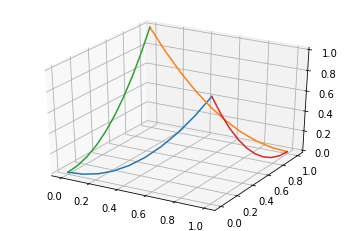

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#Initial conditions on boundary
#On y=0 and y=1
def g(x,y):
  if y==0:
    return x**2
  elif y==1:
    return (1-x)**2
#On x=0 and x=1
def h(x,y):
  if x==0:
    return y**2
  elif x==1:
    return (1-y)**2
#Plot of initial values
ax = plt.axes(projection='3d')
#plot of ic on y=0 and y=1
x_0=np.linspace(0,1,10)
y_00=np.zeros(10)
z_00=[g(x,0) for x in x_0]
ax.plot3D(x_0,y_00,z_00)
y_01=np.ones(10)
z_01=[g(x,1) for x in x_0]
ax.plot3D(x_0,y_01,z_01)
#plot of ic on x=0 and x=1
y_0=np.linspace(0,1,10)
x_00=np.zeros(10)
z_10=[h(0,y) for y in y_0]
ax.plot3D(x_00,y_0,z_10)
x_01=np.ones(10)
z_11=[h(1,y) for y in y_0]
ax.plot3D(x_01,y_0,z_11)


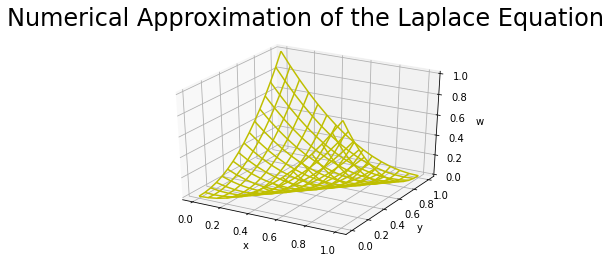

In [ ]:
def LaplaceSolver(N):
  #space points
  k=1/N
  x=np.linspace(0,1,N+1)
  y=np.linspace(0,1,N+1)

  #Getting the matrix A
  M=(N-1)*(N-1)
  A=np.zeros([M,M])

  #Diagonal
  for i in range(0,N-1):
    for j in range(0,N-1):
      A[i+(N-1)*j,i+(N-1)*j]=4

  #Lower Diagonal
  for i in range(1,N-1):
    for j in range(0,N-1):
      A[i+(N-1)*j,i+(N-1)*j-1]=-1

  #Upper Diagonal
  for i in range(0,N-2):
    for j in range(0,N-1):
      A[i+(N-1)*j,i+(N-1)*j+1]=-1

  #Lower Identity matrix
  for i in range(0,N-1):
    for j in range(1,N-1):
      A[i+(N-1)*j,i+(N-1)*(j-1)]=-1

  #Upper Identity matrix
  for i in range(0,N-1):
    for j in range(0,N-2):
      A[i+(N-1)*j,i+(N-1)*(j+1)]=-1


  #initializing the solution grid
  w=np.zeros([N+1,N+1])
  for i in range(0,N+1):
    w[i,0]=g(i*k,0)#lower
    w[i,N]=g(i*k,1)#upper
    w[0,i]=h(0,i*k)#left
    w[N,i]=h(1,i*k)#right

  #the rhs vector for the function part
  r=np.zeros(M)
  for i in range (0,N-1):
    for j in range (0,N-1):
        r[i+(N-1)*j]=k*k*4
  #the rhs vector for bottom and top boundary
  b_bottom_top=np.zeros(M)
  for i in range(0,N-1):
    b_bottom_top[i]=w[i+1,0] #bottom boundary
    b_bottom_top[(N-1)*(N-2)+i]=w[i+1,N] #top bounday
  #the rhs vector for left-right boundary
  b_left_right=np.zeros(M)
  for j in range(0,N-1):
    b_left_right[j*(N-1)]=w[0,j+1] #left boundary
    b_left_right[N-2+j*(N-1)]=w[N,j+1] #right boundary
  b=b_bottom_top+b_left_right
  #the total rhs vector
  v=b-r
  #the solution of the matrix equation
  s=np.linalg.solve(A,v)
  #the solution grid
  w[1:N,1:N]=s.reshape((N-1,N-1))
  #plotting the solution
  ax = plt.axes(projection='3d')
  X,Y=np.meshgrid(x,y)
  ax.plot_wireframe(X, Y, w,color='y')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('w')
  plt.title('Numerical Approximation of the Laplace Equation',fontsize=24,y=1.08)
  plt.show()

LaplaceSolver(15)
